<a href="https://colab.research.google.com/github/Alisonjs0/uninassau-atividade-alunos-ml-regressao/blob/main/etapas/etapa2/ETAPA_2_DELIVERYTIME.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
import joblib

In [67]:
# Importar Dados
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/delivery_time.csv')

In [68]:
df

,delivery_id,distance_km,package_weight_kg,delivery_type,vehicle_type,traffic_condition,weather,time_of_day,day_of_week,driver_experience_years,num_stops,is_priority,package_fragile,delivery_zone,customer_rating,fuel_cost,delivery_time_hours
0,DEL00331,17.62,12.45,Express,Carro,Médio,Ensolarado,Tarde,domingo,5.0,8,No,No,Urbana,3.75,5.41,22.59
1,DEL02382,11.43,3.31,Economy,Carro,Médio,Ensolarado,Manhã,Seg-Qui,8.0,2,No,Yes,Urbana,3.68,5.73,19.18
2,DEL00825,25.87,2.79,Express,Carro,Baixo,Ensolarado,Manhã,Seg-Qui,NaN,1,No,Yes,Urbana,2.98,6.13,3.92
3,DEL00336,14.21,6.99,Standard,Caminhão,Médio,Chuva Forte,Tarde,Domingo,7.0,1,Yes,Yes,Suburbana,2.10,5.34,24.66
4,DEL00551,14.31,NaN,Standard,Van,Alto,Nublado,Manhã,Sábado,1.0,1,No,Yes,Urbana,3.31,6.57,23.05
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2505,DEL02392,2.98,9.40,Standard,Carro,NaN,Ensolarado,Tarde,Sábado,8.0,1,No,No,Rural,1.41,4.86,14.57
2506,DEL00547,7.79,4.93,Standard,Moto,Médio,Ensolarado,Noite,Seg-Qui,7.0,2,No,No,Urbana,2.39,5.81,6.75
2507,DEL00345,12.47,1.65,Standard,Van,Médio,Chuva Leve,Tarde,Seg-Qui,3.0,3,No,No,Suburbana,3.26,5.13,17.88
2508,DEL01809,3.19,0.04,Standard,Moto,Baixo,Tempestade,Manhã,Sábado,6.0,2,No,No,Urbana,2.74,5.72,21.63


In [69]:
# Criar o recurso 'wellbeing_score' usando customer_rating, delivery_time_hours e driver_experience_years
# Uma maior customer_rating e driver_experience_years contribuem positivamente
# Um menor delivery_time_hours contribui positivamente (por isso é subtraído)
df['wellbeing_score'] = df['customer_rating'] + df['driver_experience_years'] - df['delivery_time_hours']


In [70]:
num_cols = df.select_dtypes(include=['number']).columns.tolist()
# Adicionar 'wellbeing_score' às colunas numéricas para tratamento posterior (capping e scaling)
if 'wellbeing_score' not in num_cols:
    num_cols.append('wellbeing_score')

print("\nNovo recurso 'wellbeing_score' criado com sucesso.")
print("\nPrimeiras 5 linhas do DataFrame com o novo recurso:\n")
df.head()


Novo recurso 'wellbeing_score' criado com sucesso.

Primeiras 5 linhas do DataFrame com o novo recurso:



,delivery_id,distance_km,package_weight_kg,delivery_type,vehicle_type,traffic_condition,weather,time_of_day,day_of_week,driver_experience_years,num_stops,is_priority,package_fragile,delivery_zone,customer_rating,fuel_cost,delivery_time_hours,wellbeing_score
0,DEL00331,17.62,12.45,Express,Carro,Médio,Ensolarado,Tarde,domingo,5.0,8,No,No,Urbana,3.75,5.41,22.59,-13.84
1,DEL02382,11.43,3.31,Economy,Carro,Médio,Ensolarado,Manhã,Seg-Qui,8.0,2,No,Yes,Urbana,3.68,5.73,19.18,-7.50
2,DEL00825,25.87,2.79,Express,Carro,Baixo,Ensolarado,Manhã,Seg-Qui,NaN,1,No,Yes,Urbana,2.98,6.13,3.92,NaN
3,DEL00336,14.21,6.99,Standard,Caminhão,Médio,Chuva Forte,Tarde,Domingo,7.0,1,Yes,Yes,Suburbana,2.10,5.34,24.66,-15.56
4,DEL00551,14.31,NaN,Standard,Van,Alto,Nublado,Manhã,Sábado,1.0,1,No,Yes,Urbana,3.31,6.57,23.05,-18.74


### Explicação do Novo Recurso: `wellbeing_score`

O `wellbeing_score` é uma feature engenheirada que tenta capturar uma métrica composta de "bem-estar" ou eficiência da entrega, baseada nos seguintes fatores:

*   **`customer_rating`**: A avaliação do cliente é um indicador direto da satisfação. Valores mais altos indicam maior bem-estar.
*   **`driver_experience_years`**: A experiência do motorista pode estar correlacionada com a eficiência e a qualidade do serviço. Mais anos de experiência tendem a um melhor bem-estar.
*   **`delivery_time_hours`**: O tempo de entrega. Um tempo de entrega menor geralmente está associado a uma experiência mais positiva para o cliente e menos estresse para o motorista, então é subtraído para que tempos menores resultem em scores maiores.

A fórmula utilizada é `wellbeing_score = customer_rating + driver_experience_years - delivery_time_hours`. Como todas essas variáveis já foram normalizadas, elas contribuem para o score em uma escala comparável, permitindo que o modelo as interprete de forma balanceada.

In [71]:
# Mostrar os tipos de dados de cada coluna
print("\nTipos de dados de cada coluna:")
df.info()


Tipos de dados de cada coluna:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   delivery_id              2510 non-null   object 
 1   distance_km              2397 non-null   float64
 2   package_weight_kg        2315 non-null   float64
 3   delivery_type            2510 non-null   object 
 4   vehicle_type             2510 non-null   object 
 5   traffic_condition        2255 non-null   object 
 6   weather                  2510 non-null   object 
 7   time_of_day              2510 non-null   object 
 8   day_of_week              2510 non-null   object 
 9   driver_experience_years  2345 non-null   float64
 10  num_stops                2510 non-null   int64  
 11  is_priority              2510 non-null   object 
 12  package_fragile          2510 non-null   object 
 13  delivery_zone            2510 non-null   objec

In [72]:
# Mostrar Quantidade de valores nulos
df.isnull().sum()

,0
delivery_id,0
distance_km,113
package_weight_kg,195
delivery_type,0
vehicle_type,0
traffic_condition,255
weather,0
time_of_day,0
day_of_week,0
driver_experience_years,165


In [73]:
# Calcular e mostrar o percentual de valores faltantes arredondado para 2 casas decimais
valores_faltantes = round(df.isnull().sum() / len(df) * 100, 2).sort_values(ascending=False)

valores_faltantes

,0
wellbeing_score,12.19
traffic_condition,10.16
package_weight_kg,7.77
driver_experience_years,6.57
customer_rating,5.94
distance_km,4.50
fuel_cost,4.38
delivery_id,0.00
vehicle_type,0.00
delivery_type,0.00


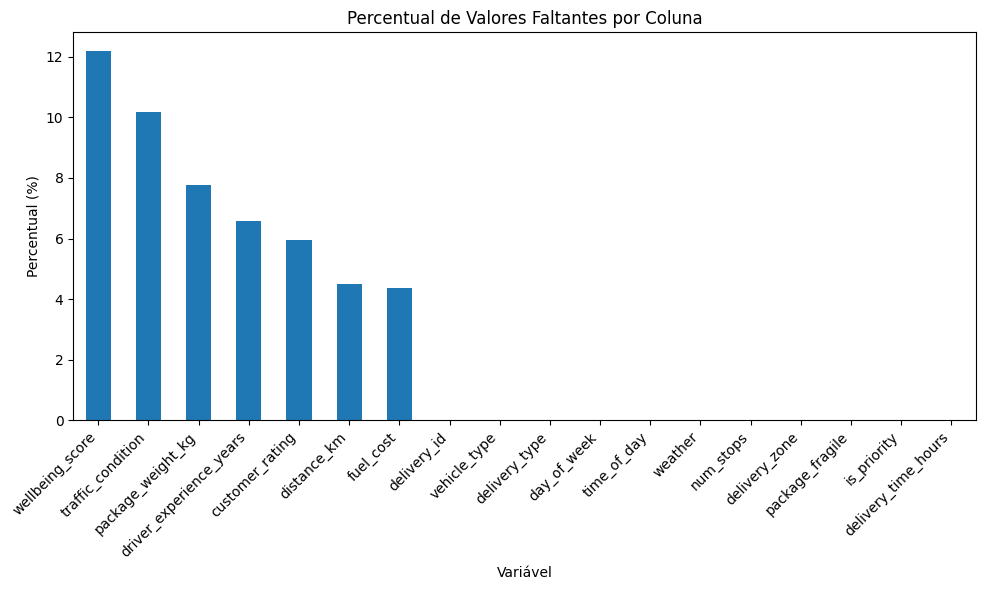

In [74]:
plt.figure(figsize=(10, 6))
valores_faltantes.plot(kind='bar')
plt.title('Percentual de Valores Faltantes por Coluna')
plt.ylabel('Percentual (%)')
plt.xlabel('Variável')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [75]:
num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_cols = df.select_dtypes(include=['object']).columns.tolist()

# Excluir 'delivery_id' das colunas categóricas para encoding, pois é um identificador
if 'delivery_id' in cat_cols:
    cat_cols.remove('delivery_id')

print("Colunas numéricas:")
print(num_cols)

print("\nColunas categóricas (para encoding):")
print(cat_cols)

Colunas numéricas:
['distance_km', 'package_weight_kg', 'driver_experience_years', 'num_stops', 'customer_rating', 'fuel_cost', 'delivery_time_hours', 'wellbeing_score']

Colunas categóricas (para encoding):
['delivery_type', 'vehicle_type', 'traffic_condition', 'weather', 'time_of_day', 'day_of_week', 'is_priority', 'package_fragile', 'delivery_zone']


🧠 Por que isso é importante?
numéricas → melhor usar mediana (robusta a outliers)
categóricas → melhor usar moda (categoria mais frequente)

## Imputação Numérica (mediana)

In [76]:
imputer_num = SimpleImputer(strategy='median')
df[num_cols] = imputer_num.fit_transform(df[num_cols])

🧠 O que acontece aqui?
SimpleImputer(strategy='median') → calcula a mediana de cada coluna numérica.
.fit_transform() →
-- fit = aprende a mediana
-- transform = substitui NaN por essa mediana
Substitui de forma segura valores que poderiam quebrar o modelo.


### Imputação Categórica (moda)

In [77]:
imputer_cat = SimpleImputer(strategy='most_frequent')
df[cat_cols] = imputer_cat.fit_transform(df[cat_cols])

# Limpar strings nas colunas categóricas após a imputação
# Remover espaços em branco e converter para minúsculas
for col in cat_cols:
    if df[col].dtype == 'object':
        df[col] = df[col].apply(lambda x: str(x).strip().lower())

print("Valores categóricos limpos (espaços e minúsculas) com sucesso.")

Valores categóricos limpos (espaços e minúsculas) com sucesso.


🧠 Explicação:
Para texto, não existe média nem mediana.
A categoria mais comum faz sentido como preenchimento.
Evita criar valores inexisten

## Tratamento de Outliers

🎯 Objetivo
Reduzir o impacto de valores extremos que possam distorcer os treinos do modelo.
Com base no dataset, colunas numéricas são:

*   distance_km,
*   package_weight_kg
*   driver_experience_years
*   num_stops
*   customer_rating
*   fuel_cost
*   delivery_time_hours

## Aplicar capping pelo método do IQR

In [78]:
for col in num_cols:
    if col == 'final_grade':
        continue

    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR

    df[col] = np.where(df[col] < lower, lower, df[col])
    df[col] = np.where(df[col] > upper, upper, df[col])

IQR = Q3 - Q1 → intervalo onde estão 50% dos dados.
Valores abaixo de Q1 - 1.5IQR ou acima de Q3 + 1.5IQR são considerados outliers.
np.where() → substitui valores fora dos limites pelos limites seguros.
Mantém distribuição consistente sem remover dados.

## Encoding das Variáveis Categóricas

Vamos mapear todas as categorias do dataset:
✔️ Nominais (sem ordem):

*   delivery_type
*   vehicle_type
*   traffic_condition
*   weather
*   time_of_day
*   day_of_week
*   is_priority
*   package_fragile
*   delivery_zone

Todas elas recebem One-Hot Encoding.

## Aplicar One-Hot Encoding

In [79]:
# Aplicar One-Hot Encoding nas colunas categóricas limpas
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

O que acontece aqui?

get_dummies() cria uma coluna para cada categoria (ex.: gender_M).
drop_first=True evita multicolinearidade retirando uma categoria de referência.
Converte texto → números, sem perder significado.

## Normalização das Variáveis Numéricas
# 🎯 Objetivo
Colocar todas as features na mesma escala, essencial para modelos lineares e redes neurais.

## Aplicar StandardScaler

In [80]:
scaler = StandardScaler()
# Re-identificar colunas numéricas para incluir os novos recursos antes da normalização final
current_num_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
df[current_num_cols] = scaler.fit_transform(df[current_num_cols])

# O que esse código faz?
# StandardScaler() transforma cada coluna para ter:
# -- média = 0
# -- desvio padrão = 1
# Isso evita que features com valores altos dominem o modelo.
# joblib.dump() salva o scaler → para aplicar depois em dados de teste e produção.

In [81]:
# Criar um novo recurso: 'delivery_speed_kmh' (distância / tempo)
# Adicionar um pequeno valor (epsilon) para evitar divisão por zero em 'delivery_time_hours'
epsilon = 1e-6
df['delivery_speed_kmh'] = df['distance_km'] / (df['delivery_time_hours'] + epsilon)

# Adicionar 'delivery_speed_kmh' às colunas numéricas para tratamento posterior (scaling)
if 'delivery_speed_kmh' not in num_cols:
    num_cols.append('delivery_speed_kmh')

print("\nNovo recurso 'delivery_speed_kmh' criado com sucesso.")


Novo recurso 'delivery_speed_kmh' criado com sucesso.


### Explicação do Novo Recurso: `delivery_speed_kmh`

Este novo recurso representa a velocidade média da entrega, calculada como a distância percorrida dividida pelo tempo total de entrega. Ele pode ser um indicador importante de eficiência e um preditor útil para o tempo de entrega ou satisfação do cliente.

*   **`distance_km`**: Distância percorrida em quilômetros (já normalizada).
*   **`delivery_time_hours`**: Tempo total gasto na entrega em horas (já normalizada).

Ao criar este recurso a partir de variáveis já normalizadas, estamos introduzindo uma nova perspectiva sobre a relação entre a distância e o tempo, que pode ser capturada por modelos de Machine Learning.

In [82]:
print("\nInformações atualizadas do DataFrame após as modificações:")
df.info()


Informações atualizadas do DataFrame após as modificações:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2510 entries, 0 to 2509
Data columns (total 32 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   delivery_id                      2510 non-null   object 
 1   distance_km                      2510 non-null   float64
 2   package_weight_kg                2510 non-null   float64
 3   driver_experience_years          2510 non-null   float64
 4   num_stops                        2510 non-null   float64
 5   customer_rating                  2510 non-null   float64
 6   fuel_cost                        2510 non-null   float64
 7   delivery_time_hours              2510 non-null   float64
 8   wellbeing_score                  2510 non-null   float64
 9   delivery_type_express            2510 non-null   bool   
 10  delivery_type_standard           2510 non-null   bool   
 11  vehicle_type_carro    

In [83]:
print("\nPrimeiras 5 linhas do DataFrame com o novo recurso:\n")
df.head()


Primeiras 5 linhas do DataFrame com o novo recurso:



,delivery_id,distance_km,package_weight_kg,driver_experience_years,num_stops,customer_rating,fuel_cost,delivery_time_hours,wellbeing_score,delivery_type_express,...,time_of_day_noite,time_of_day_tarde,day_of_week_seg-qui,day_of_week_sexta,day_of_week_sábado,is_priority_yes,package_fragile_yes,delivery_zone_suburbana,delivery_zone_urbana,delivery_speed_kmh
0,DEL00331,0.212253,2.647201,0.091559,3.108428,1.700263,-0.126139,0.384929,-0.273771,True,...,False,True,False,False,False,False,False,False,True,0.551407
1,DEL02382,-0.465047,-0.674816,1.179863,-0.081985,1.554082,0.288737,0.005903,0.432710,False,...,False,False,True,False,False,False,True,False,True,-78.762651
2,DEL00825,1.114955,-0.868911,-0.271209,-0.879588,0.092268,0.807332,-1.690263,0.042140,True,...,False,False,True,False,False,False,True,False,True,-0.659634
3,DEL00336,-0.160864,0.698782,0.817095,-0.879588,-1.745441,-0.216893,0.615012,-0.465434,False,...,False,True,False,False,False,True,True,True,False,-0.261562
4,DEL00551,-0.149922,-0.055204,-1.359513,-0.879588,0.781409,1.377787,0.436058,-0.819789,False,...,False,False,False,False,True,False,True,False,True,-0.343811


### Salvar dataset final

In [84]:
df.isnull().sum()

,0
delivery_id,0
distance_km,0
package_weight_kg,0
driver_experience_years,0
num_stops,0
customer_rating,0
fuel_cost,0
delivery_time_hours,0
wellbeing_score,0
delivery_type_express,0


In [85]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/delivery_time_final.csv', index=False)